# Trabajo Práctico Integrador 2

<img src='data.jpg'>

## 

## Análisis exploratorio

In [1]:
#1.IMPORTAR LAS LIBRERÍAS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
sns.set(style='dark',palette = 'dark', font='Dejavu Sans', font_scale=1)

In [3]:
#2. CARGAR LOS DATOS EN EL DATAFRAME
df =  pd.read_csv('/work/exams.csv')
df

,id,gender,race/ethnicity,parental level of education,lunch,employed,test preparation course,math score,physics score,chemistry score,algebra_score
0,10-5894942,male,group A,high school,standard,yes,completed,67.0,67.0,63.0,66.0
1,41-1676468,female,group D,some high school,free/reduced,no,none,40.0,59.0,55.0,51.0
2,64-6396924,male,group E,some college,free/reduced,no,none,59.0,60.0,50.0,56.0
3,35-2426788,male,group B,high school,standard,yes,none,77.0,78.0,68.0,74.0
4,60-9387304,male,group E,associate's degree,standard,yes,completed,78.0,73.0,68.0,73.0
...,...,...,...,...,...,...,...,...,...,...,...
1013,82-7312119,male,group E,associate's degree,standard,yes,none,74.0,73.0,67.0,71.0
1014,45-3445439,male,group E,some college,free/reduced,no,none,78.0,84.0,77.0,80.0
1015,02-3651562,male,group A,some college,standard,no,completed,78.0,78.0,74.0,77.0
1016,05-5203587,female,group B,some college,standard,yes,none,75.0,76.0,81.0,77.0


In [4]:
#Las primeras cinco filas
df.head()

,id,gender,race/ethnicity,parental level of education,lunch,employed,test preparation course,math score,physics score,chemistry score,algebra_score
0,10-5894942,male,group A,high school,standard,yes,completed,67.0,67.0,63.0,66.0
1,41-1676468,female,group D,some high school,free/reduced,no,none,40.0,59.0,55.0,51.0
2,64-6396924,male,group E,some college,free/reduced,no,none,59.0,60.0,50.0,56.0
3,35-2426788,male,group B,high school,standard,yes,none,77.0,78.0,68.0,74.0
4,60-9387304,male,group E,associate's degree,standard,yes,completed,78.0,73.0,68.0,73.0


In [5]:
#Las últimas 5 filas
df.tail()

,id,gender,race/ethnicity,parental level of education,lunch,employed,test preparation course,math score,physics score,chemistry score,algebra_score
1013,82-7312119,male,group E,associate's degree,standard,yes,none,74.0,73.0,67.0,71.0
1014,45-3445439,male,group E,some college,free/reduced,no,none,78.0,84.0,77.0,80.0
1015,02-3651562,male,group A,some college,standard,no,completed,78.0,78.0,74.0,77.0
1016,05-5203587,female,group B,some college,standard,yes,none,75.0,76.0,81.0,77.0
1017,13-3347050,male,group D,some college,standard,no,completed,70.0,60.0,65.0,65.0


In [6]:
#Resumen Estadítico
df.describe()

,math score,physics score,chemistry score,algebra_score
count,1011.000000,1011.000000,1011.000000,1011.000000
mean,66.480712,69.063304,67.789318,67.778437
std,15.326880,14.694107,15.559853,14.450680
min,13.000000,27.000000,23.000000,22.000000
25%,56.000000,60.000000,58.000000,59.000000
50%,67.000000,70.000000,68.000000,68.000000
75%,77.000000,79.000000,79.000000,78.000000
max,100.000000,100.000000,100.000000,100.000000


In [7]:
#3. REVISAR LOS TIPOS DE DATOS
df.dtypes

id                              object
gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
employed                        object
test preparation course         object
math score                     float64
physics score                  float64
chemistry score                float64
algebra_score                  float64
dtype: object

In [8]:
#4. ELIMINAR LOS DIPLICADOS
print(f'Original: {df.id.count()} filas')
duplicate_rows_df = df[df.duplicated()]
print(f'Cantidad de filas duplicadas: {duplicate_rows_df.id.count()}')

#Eliminar los duplicados
df = df.drop_duplicates()


Original: 1018 filas
Cantidad de filas duplicadas: 18


In [9]:
#Filas después de eliminar los duplicados
print(f'Final: {df.id.count()} filas')

Final: 1000 filas


In [10]:
# 5. ELIMINAR LAS COLUMNAS IRRELEVANTES
print(df.columns)
df = df.drop(['id'], axis=1)

Index(['id', 'gender', 'race/ethnicity', 'parental level of education',
       'lunch', 'employed', 'test preparation course', 'math score',
       'physics score', 'chemistry score', 'algebra_score'],
      dtype='object')


In [11]:
print(df.columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'employed', 'test preparation course', 'math score', 'physics score',
       'chemistry score', 'algebra_score'],
      dtype='object')


In [12]:
#6. RENOMBRAR LAS COLUMNAS
df = df.rename(columns = {
    'gender' : 'Gender',
    'race/ethnicity' : 'Ethnicity',
    'parental level of education' : 'Parental level of education',
    'lunch' : 'Lunch',
    'employed' : 'Employed',
    'test preparation course' : 'Test preparation course',
    'math score' : 'Math score',
    'physics score' : 'Physics score',
    'chemistry score': 'Chemistry score',
    'algebra_score' : 'Algebra score'})
df.columns

Index(['Gender', 'Ethnicity', 'Parental level of education', 'Lunch',
       'Employed', 'Test preparation course', 'Math score', 'Physics score',
       'Chemistry score', 'Algebra score'],
      dtype='object')

In [13]:
# 7. ELIMINAR VALORES PERDIDOS O NULOS
# Encontrar valores nulos
print(df.isnull().sum())

#Eliminar los valores perdidos
df = df.dropna()
print()

#Despues de eliminar los nulos
print(df.isnull().sum())


Gender                         0
Ethnicity                      0
Parental level of education    0
Lunch                          0
Employed                       0
Test preparation course        0
Math score                     7
Physics score                  7
Chemistry score                7
Algebra score                  7
dtype: int64

Gender                         0
Ethnicity                      0
Parental level of education    0
Lunch                          0
Employed                       0
Test preparation course        0
Math score                     0
Physics score                  0
Chemistry score                0
Algebra score                  0
dtype: int64


### Distribución de los datos

Mediante gráficos de boxplot, analizamos la distribución de los datos en las notas por materia (scores), encontrando que hay simetría entre los rangos intercuartiles de cada asignatura. Asimismo, con este gráfico, vemos si hay outliers o datos anómalos.

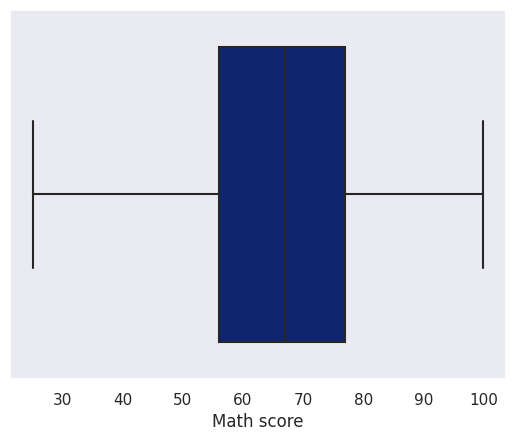

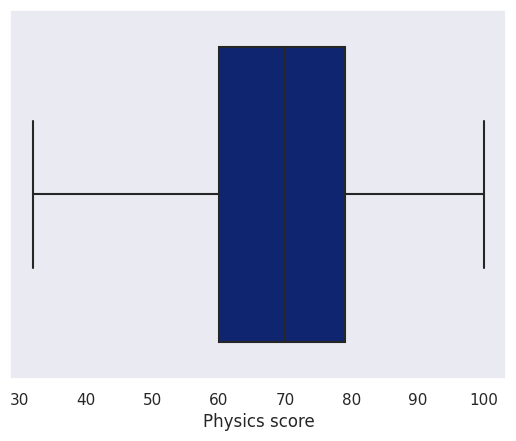

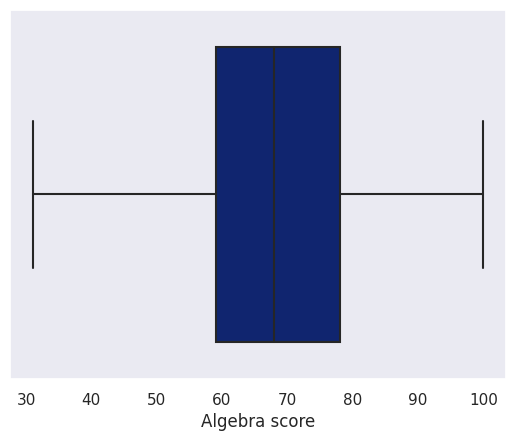

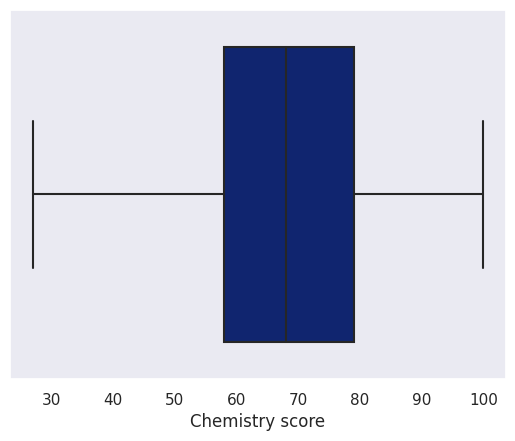

In [40]:
# 8. DETECTAR OUTLIERS
sns.boxplot(x=df['Math score'])
plt.show()
sns.boxplot(x=df['Physics score'])
plt.show()
sns.boxplot(x=df['Algebra score'])
plt.show()
sns.boxplot(x=df['Chemistry score'])
plt.show()


# 

Eliminamos los outliers del dataframe.

In [15]:
print(f'Antes: {df.Lunch.count()} filas\n')
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
df = df[~((df < (Q1-1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f'\nDespues: {df.Lunch.count()} filas')


Antes: 993 filas

Math score         21.0
Physics score      19.0
Chemistry score    21.0
Algebra score      19.0
dtype: float64

Despues: 984 filas
/tmp/ipykernel_76/4264372006.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1-1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
/tmp/ipykernel_76/4264372006.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1-1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


### 

Para ver qué frecuencias e interrelaciones hay en los datos que disponemos, usando histogramas y mapas de calor respectivamente.

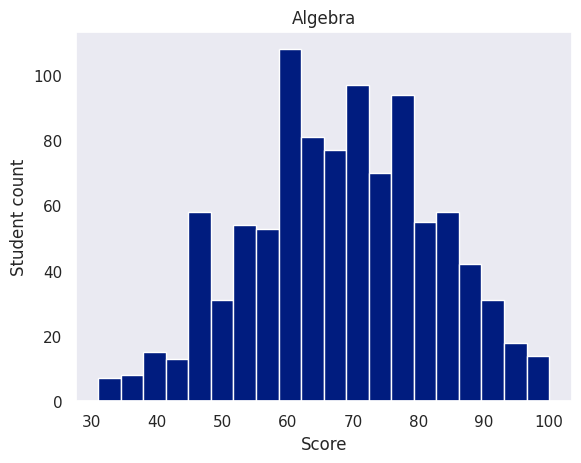

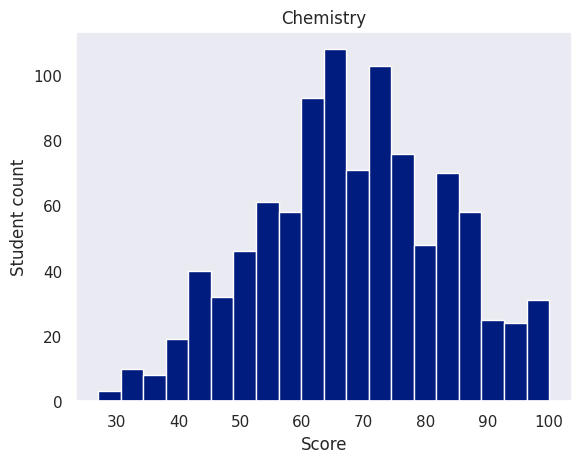

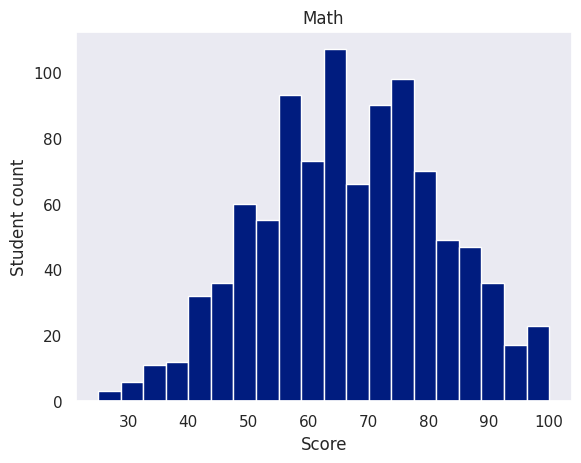

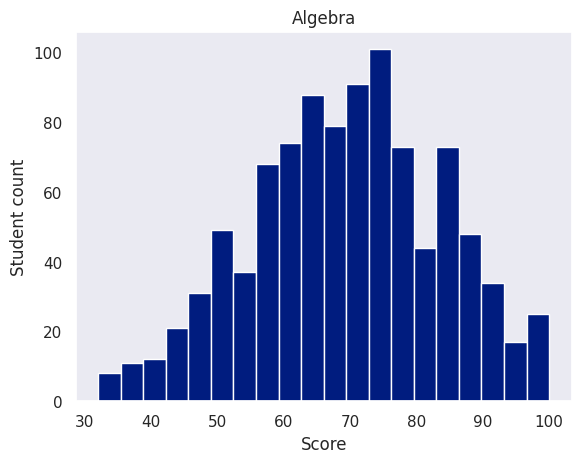

In [41]:
# 9. ENCONTRAR CORRELACIONES Y FRECUENCIAS
plt.hist(df['Algebra score'], bins = 20)
plt.title('Algebra')
plt.ylabel('Student count')
plt.xlabel('Score')
plt.show()

plt.hist(df['Chemistry score'], bins = 20)
plt.title('Chemistry')
plt.ylabel('Student count')
plt.xlabel('Score')
plt.show()

plt.hist(df['Math score'], bins = 20)
plt.title('Math')
plt.ylabel('Student count')
plt.xlabel('Score')
plt.show()

plt.hist(df['Physics score'], bins = 20)
plt.title('Algebra')
plt.ylabel('Student count')
plt.xlabel('Score')
plt.show()


In [42]:
#Correlación entre los datos = Mapas de calor
c =  df.corr()
print(c)

                 Math score  Physics score  Chemistry score  Algebra score  \
Math score         1.000000       0.812055         0.798312       0.916674   
Physics score      0.812055       1.000000         0.951536       0.968358   
Chemistry score    0.798312       0.951536         1.000000       0.964652   
Algebra score      0.916674       0.968358         0.964652       1.000000   
Average Score      0.916600       0.968701         0.964874       0.999898   

                 Average Score  
Math score            0.916600  
Physics score         0.968701  
Chemistry score       0.964874  
Algebra score         0.999898  
Average Score         1.000000  


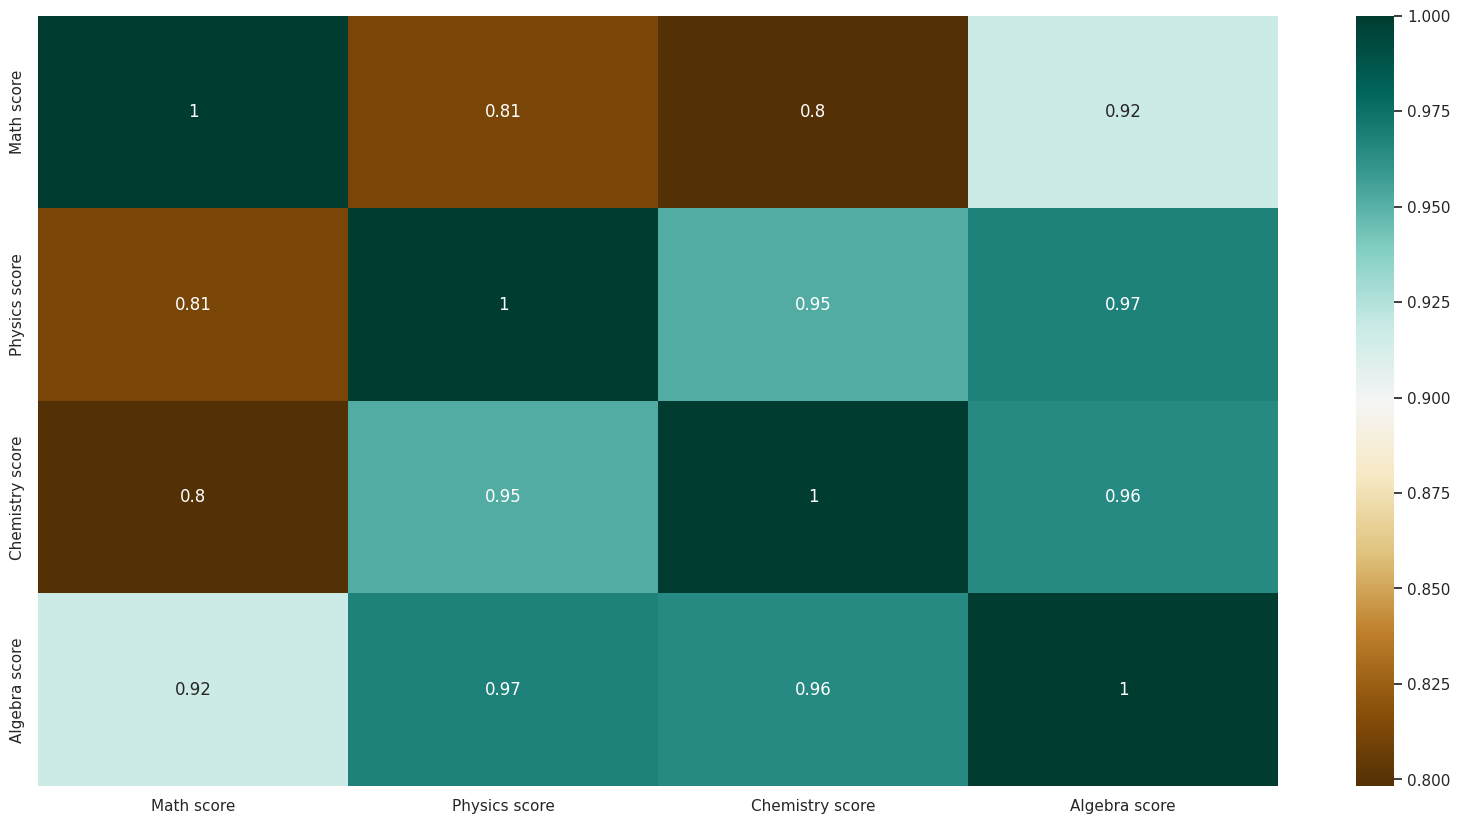

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(c,cmap="BrBG", annot=True)
plt.show()

Graficamos las variables categóricas para hacer una exploración rápida.

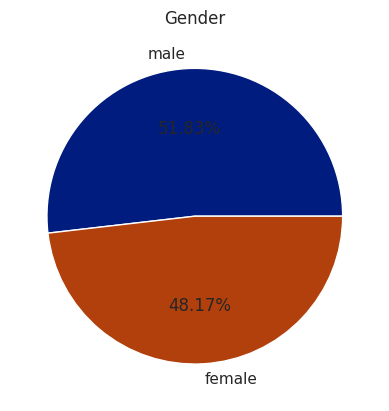

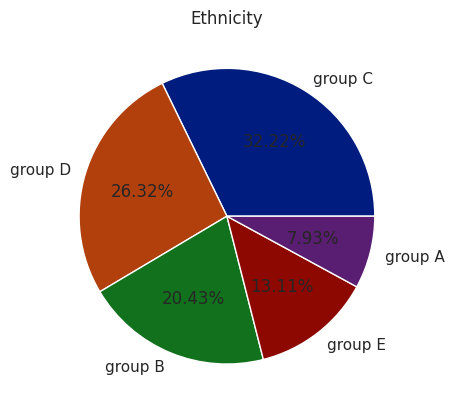

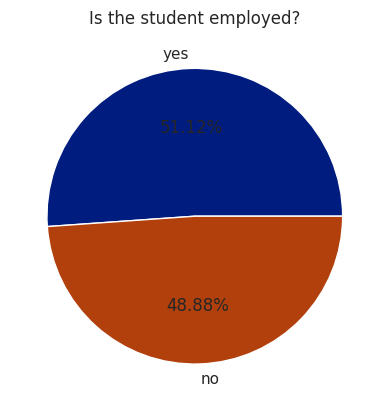

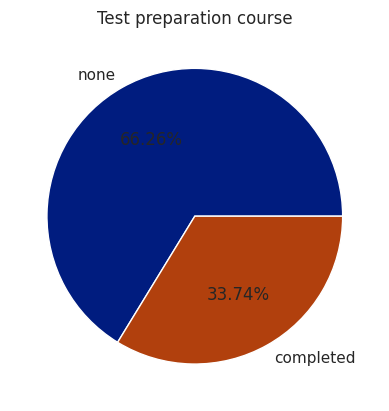

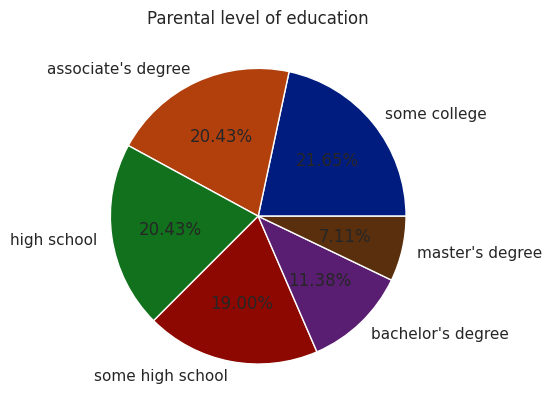

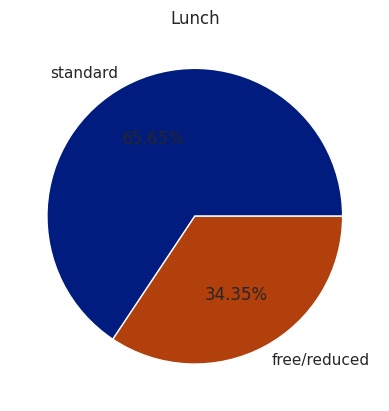

In [19]:
#pandas.value_counts() -> devuelve una Serie con valores únicos en orden descendente de frecuencia
labels = df['Gender'].value_counts().index
sizes = df['Gender'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.2f%%')
plt.title('Gender')
plt.show()

#repetimos para ETNIA, EMPLEO y el resto de las variables categóricas
labels = df['Ethnicity'].value_counts().index
sizes = df['Ethnicity'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.2f%%')
plt.title('Ethnicity')
plt.show()

labels = df['Employed'].value_counts().index
sizes = df['Employed'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.2f%%')
plt.title('Is the student employed?')
plt.show()

labels = df['Test preparation course'].value_counts().index
sizes = df['Test preparation course'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.2f%%')
plt.title('Test preparation course')
plt.show()

labels = df['Parental level of education'].value_counts().index
sizes = df['Parental level of education'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.2f%%')
plt.title('Parental level of education')
plt.show()

labels = df['Lunch'].value_counts().index
sizes = df['Lunch'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.2f%%')
plt.title('Lunch')
plt.show()




## Respondiendo preguntas

### Ejemplo : ¿Hay alguna relación entre el promedio de notas obtenidas y el hecho de hacer un curso preparatorio?

In [20]:
df['Average Score'] = df.mean(axis = 1)
#axis = 1 hace que aplique la función sobre los valores numéricos de la fila en lugar de las columnas
df


,Gender,Ethnicity,Parental level of education,Lunch,Employed,Test preparation course,Math score,Physics score,Chemistry score,Algebra score,Average Score
0,male,group A,high school,standard,yes,completed,67.0,67.0,63.0,66.0,65.75
1,female,group D,some high school,free/reduced,no,none,40.0,59.0,55.0,51.0,51.25
2,male,group E,some college,free/reduced,no,none,59.0,60.0,50.0,56.0,56.25
3,male,group B,high school,standard,yes,none,77.0,78.0,68.0,74.0,74.25
4,male,group E,associate's degree,standard,yes,completed,78.0,73.0,68.0,73.0,73.00
...,...,...,...,...,...,...,...,...,...,...,...
1001,male,group C,high school,standard,yes,none,73.0,70.0,65.0,69.0,69.25
1002,male,group D,associate's degree,free/reduced,no,completed,85.0,91.0,92.0,89.0,89.25
1003,female,group C,some high school,free/reduced,yes,none,32.0,35.0,41.0,36.0,36.00
1004,female,group C,some college,standard,yes,none,73.0,74.0,82.0,76.0,76.25


In [21]:
si = df[df['Test preparation course'] == 'completed']
no = df[df['Test preparation course'] == 'none']

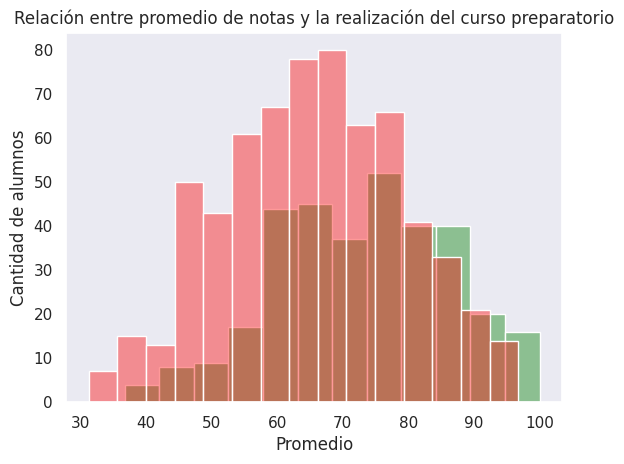

In [22]:
sns.histplot(si['Average Score'], color = 'green', alpha = .4, fill = True)
sns.histplot(no['Average Score'], color = 'red', alpha = .4, fill = True)
plt.title('Relación entre promedio de notas y la realización del curso preparatorio')
plt.xlabel("Promedio")
plt.ylabel("Cantidad de alumnos")
plt.show()

In [23]:
print('Realizaron el curso:', si['Test preparation course'].count())
print('No realizaron el curso:', no['Test preparation course'].count())

Realizaron el curso: 332
No realizaron el curso: 652


Conclusión : Si bien la cantidad de alumnos que no realizó el curso casi duplica a la de quienes lo han completado, esta diferencia no se ve reflejada significativamente en el promedio de notas.

Se recomienda auditar los contenidos del curso, a fines de lograr una mejora en el rendimiento académico y aumentar el interés del alumnado.

### ¿Cuál es la relación entre el promedio de notas y el género?

Se grafica la relación entre el promedio de notas de acuerdo al género de los estudiantes. Se grafica en azul a los estudiantes de género masculino y en rojo a los estudiantes de género femenino.

In [24]:
sns.set(style='dark',palette = 'dark', font='Dejavu Sans', font_scale=1)

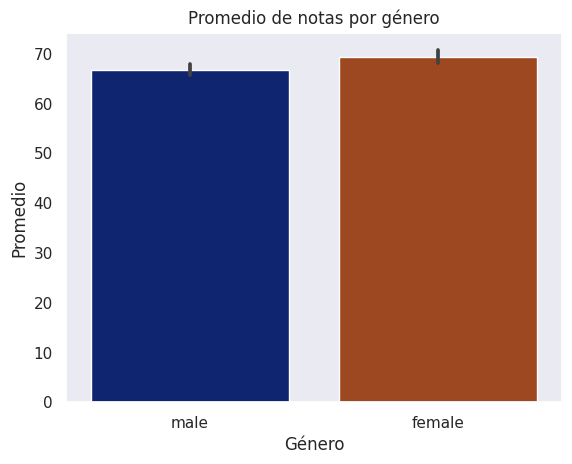

In [25]:
sns.barplot(data=df, x='Gender', y = 'Average Score')
plt.title('Promedio de notas por género')
plt.xlabel("Género")
plt.ylabel("Promedio")
plt.show()

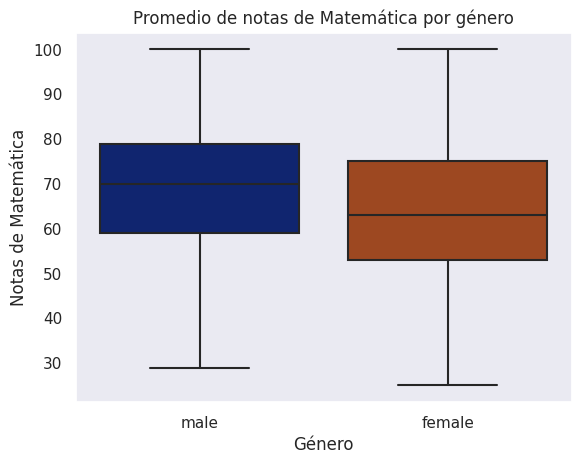

In [26]:
sns.boxplot(data=df, y= 'Math score', x = 'Gender')
plt.title('Promedio de notas de Matemática por género')
plt.xlabel("Género")
plt.ylabel("Notas de Matemática")
plt.show()

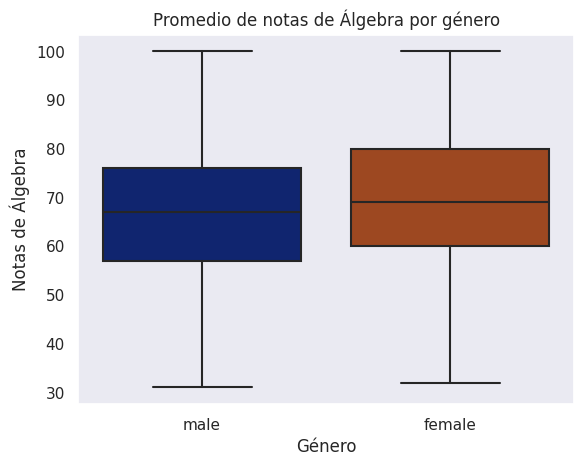

In [27]:
sns.boxplot(data=df, y= 'Algebra score', x = 'Gender')
plt.title('Promedio de notas de Álgebra por género')
plt.xlabel("Género")
plt.ylabel("Notas de Álgebra")
plt.show()

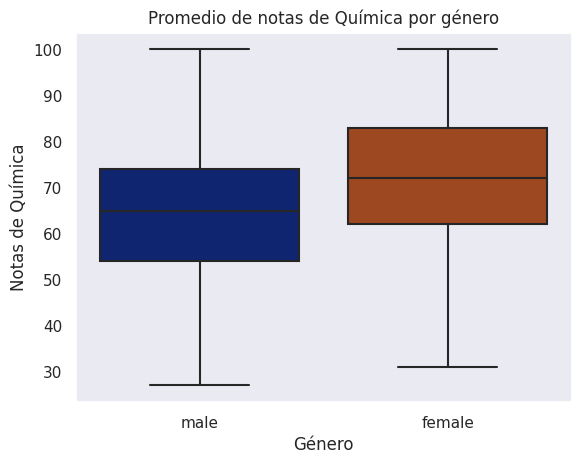

In [28]:
sns.boxplot(data=df, y= 'Chemistry score', x = 'Gender')
plt.title('Promedio de notas de Química por género')
plt.xlabel("Género")
plt.ylabel("Notas de Química")
plt.show()

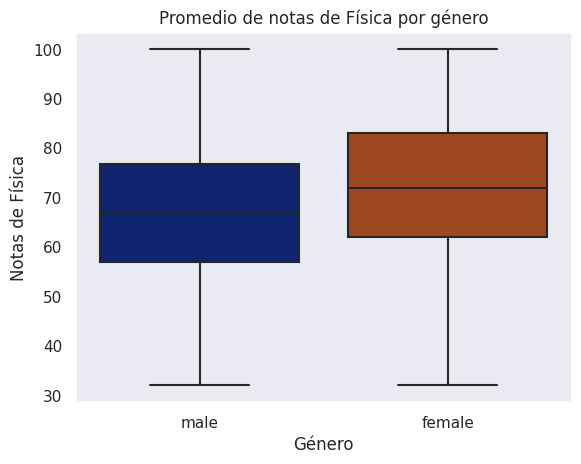

In [29]:
sns.boxplot(data=df, y= 'Physics score', x = 'Gender')
plt.title('Promedio de notas de Física por género')
plt.xlabel("Género")
plt.ylabel("Notas de Física")
plt.show()

Conclusión: Si bien el promedio de notas es casi equitativo tanto entre hombres y mujeres, al desagregar los datos por asignatura, observamos que los hombres tienen menor promedio en Química, Física y Algebra. Recomendamos realizar un estudio más profundo en cuanto a las razones de este comportamiento para poder mejorar estas calificaciones. 

### ¿Qué relación guarda el promedio de notas obtenidas con la situación laboral de los estudiantes?

Se realizan dos dataframes aparte de acuerdo a la situación laboral de los estudiantes, uno de estudiantes con empleo y otro para estudiantes desempleados. Luego, en base a esos resultados, se grafica la relación entre el promedio de notas de los estudiantes y su situación laboral, graficando en color verde a los que sí están empleados y en rojo los que no están empleados.

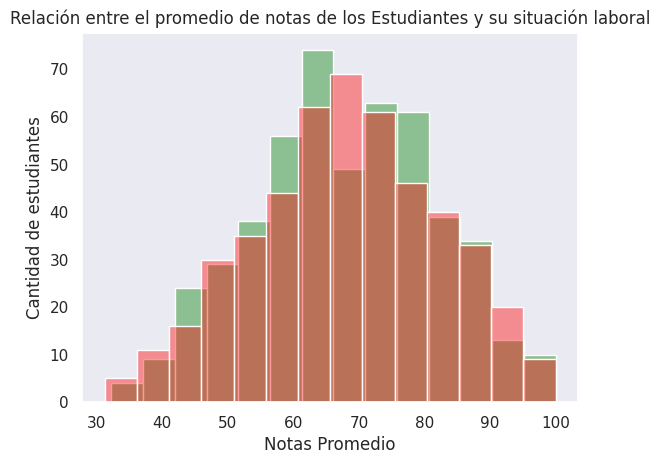

In [30]:
es = df[df['Employed'] == 'yes']
en = df[df['Employed'] == 'no']

sns.histplot(es['Average Score'], color = 'green', alpha = .4, fill = True)
sns.histplot(en['Average Score'], color = 'red', alpha = .4, fill = True)
plt.title('Relación entre el promedio de notas de los Estudiantes y su situación laboral')
plt.xlabel("Notas Promedio")
plt.ylabel("Cantidad de estudiantes")
plt.show()



En base a estos resultados, se realizan otros dataframes sobre la base de los dataframes de estudiantes empleados y desempleados, esta vez distinguiendo si realizaron  no el curso preparatorio, graficando en verde a los que sí lo realizaron y en rojo a los que no lo realizaron.

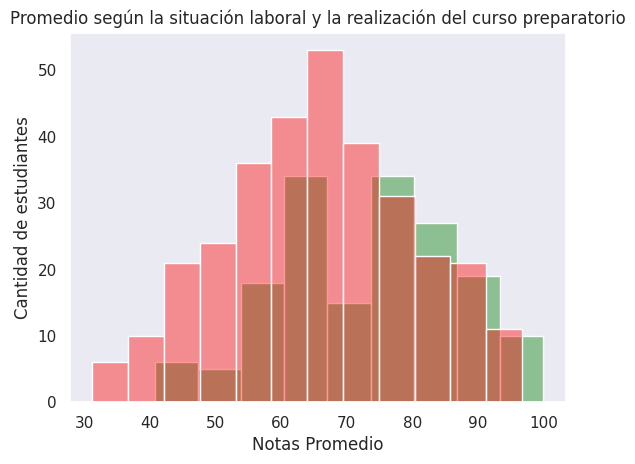

In [31]:
es_t = es[es['Test preparation course'] == 'completed']
en_t = en[en['Test preparation course'] == 'none']

sns.histplot(es_t['Average Score'], color = 'green', alpha = .4, fill = True)
sns.histplot(en_t['Average Score'], color = 'red', alpha = .4, fill = True)
plt.title('Promedio según la situación laboral y la realización del curso preparatorio')
plt.xlabel("Notas Promedio")
plt.ylabel("Cantidad de estudiantes")
plt.show()

Conclusión: No se observa una diferencia clara entre calificaciones, pero se nota que quienes no tienen empleo tuvieron notas más altas. Vale la pena resaltar el compromiso de quienes no están empleados en realizar el test de preparación, el cual se ve reflejado en el alto rendimiento. También se observa que muchos de los estudiantes con empleo no realizaron el test de preparación, por lo que recomendamos buscar opciones para este grupo de estudiantes pueda acceder a la realización del curso y mejorar las calificaciones.

### ¿Cuál fue el comportamiento de los distintos grupos étnicos?

Se graficó el promedio de notas obtenidos por los distintos grupos étnicos discriminados por género. En azul, los datos corresponden al género masculino y en rojo al género femenino. El primer recuadro grafica las notas en total y en las siguientes por materia. 

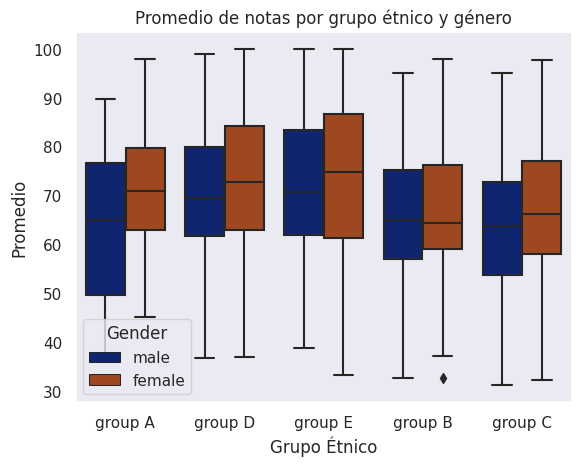

In [32]:
sns.boxplot(data = df, x= 'Ethnicity', y = 'Average Score', hue='Gender')
plt.title('Promedio de notas por grupo étnico y género')
plt.xlabel("Grupo Étnico")
plt.ylabel("Promedio")
plt.show()

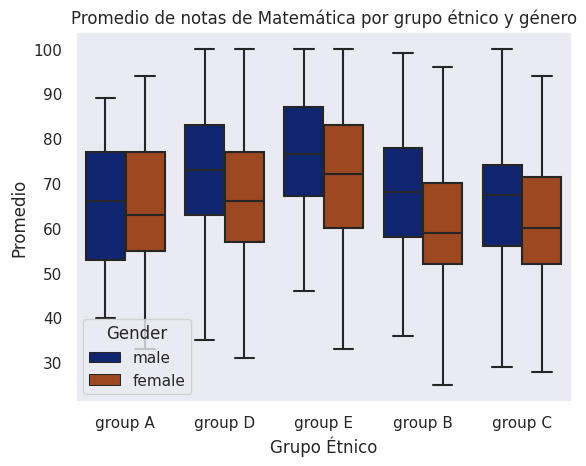

In [33]:
sns.boxplot(data = df, x= 'Ethnicity', y = 'Math score', hue='Gender')
plt.title('Promedio de notas de Matemática por grupo étnico y género')
plt.xlabel("Grupo Étnico")
plt.ylabel("Promedio")
plt.show()

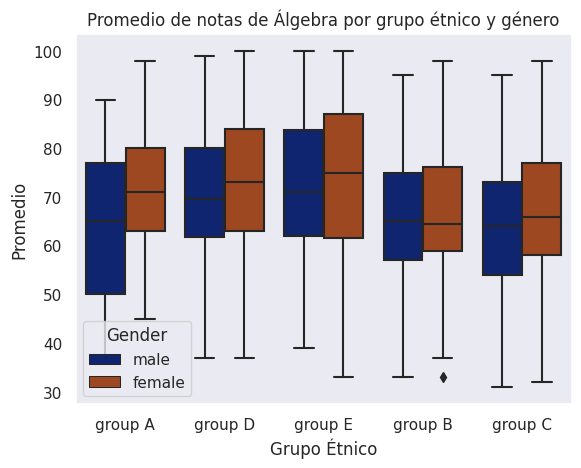

In [34]:
sns.boxplot(data = df, x= 'Ethnicity', y = 'Algebra score', hue='Gender')
plt.title('Promedio de notas de Álgebra por grupo étnico y género')
plt.xlabel("Grupo Étnico")
plt.ylabel("Promedio")
plt.show()

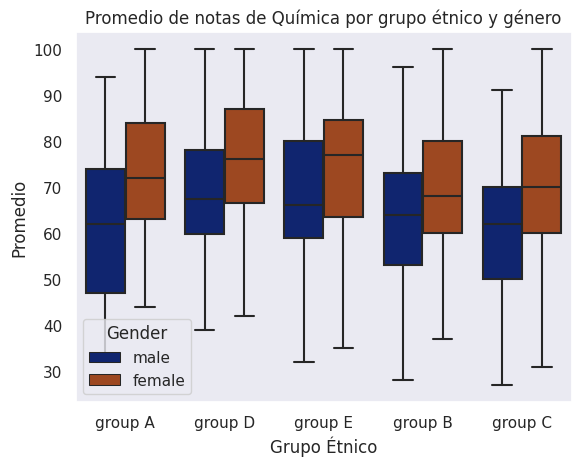

In [35]:
sns.boxplot(data = df, x= 'Ethnicity', y = 'Chemistry score', hue='Gender')
plt.title('Promedio de notas de Química por grupo étnico y género')
plt.xlabel("Grupo Étnico")
plt.ylabel("Promedio")
plt.show()

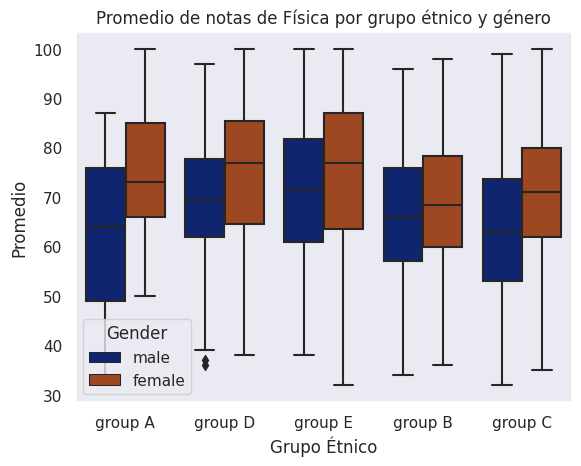

In [36]:
sns.boxplot(data = df, x= 'Ethnicity', y = 'Physics score', hue='Gender')
plt.title('Promedio de notas de Física por grupo étnico y género')
plt.xlabel("Grupo Étnico")
plt.ylabel("Promedio")
plt.show()

Conclusión: Se ve una marcada tendencia a que las mujeres de todos los grupos étnicos tengan promedios más altos. Se recomienda seguir continuando con los programas de estímulo dirigidos a este género.

En base a los resultados obtenidos, observamos que en el grupo A se agrupan la mayor cantidad de notas bajas, especialmente entre los estudiantes del género masculino. Realizamos un nuevo dataframe con los datos del grupo A, y en base a ese dataframe, realizamos otros separados por género.

In [37]:
ga = df[df['Ethnicity'] == 'group A']
mga = ga[ga['Gender'] == 'male']
fga = ga[ga['Gender'] == 'female']


Realizamos otro dataframe, en base a los datos agrupados por género masculino, y los dividimos entre quienes completaron el curso preparatorio (en verde)  y los que no lo hicieron (en rojo).

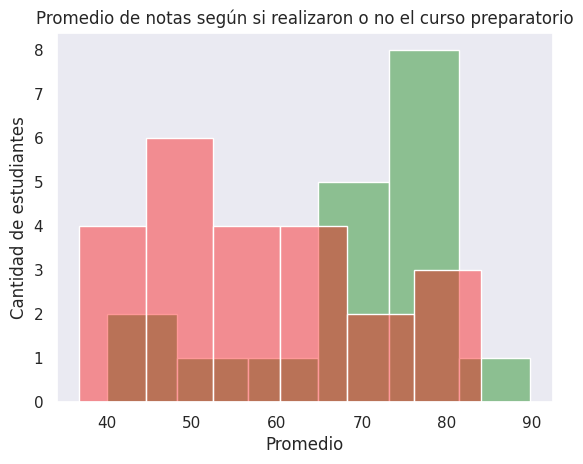

In [38]:
mga_ts = mga[mga['Test preparation course'] == 'completed']
mga_tn = mga[mga['Test preparation course'] == 'none']

sns.histplot(mga_ts['Average Score'], color = 'green', alpha = .4, fill = True)
sns.histplot(mga_tn['Average Score'], color = 'red', alpha = .4, fill = True)
plt.title('Promedio de notas según si realizaron o no el curso preparatorio')
plt.xlabel("Promedio")
plt.ylabel("Cantidad de estudiantes")
plt.show()

Conclusión: teniendo en cuenta que el grupo A es el grupo con menor cantidad de inscriptos, también es el grupo que tiene el menor rendimiento, especialmente entre los hombres. También encontramos que la mayoría de las calificaciones bajas corresponden a personas que no realizaron el curso de preparación. Recomendamos, visto que el promedio de notas aumenta por la realización del curso,  estudiar en profundidad las razones por las que hay tan pocas personas inscriptas y por qué no están interesadas en realizar el curso de preparación y estudiar acciones a realizar al respecto.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0e689a93-1edc-4e59-b222-64822b499fcc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>